<a href="https://colab.research.google.com/github/Gops03/Ejercicios/blob/main/PARCIAL2/PARCIAL2SYSPUNTO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir


--2023-10-27 22:03:34--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 74.125.143.113, 74.125.143.102, 74.125.143.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.143.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0r5q9cbc5n47i19ia7hhngfn9bm3k0e4/1698444150000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=48543ec6-6628-480b-9504-6f0086dbb8a2 [following]
--2023-10-27 22:03:34--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0r5q9cbc5n47i19ia7hhngfn9bm3k0e4/1698444150000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=48543ec6-6628-480b-9504-6f0086dbb8a2
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 173.194.69.132, 

Xt shape: (1200, 4000)
Tiempo [s] 0.3333333333333333


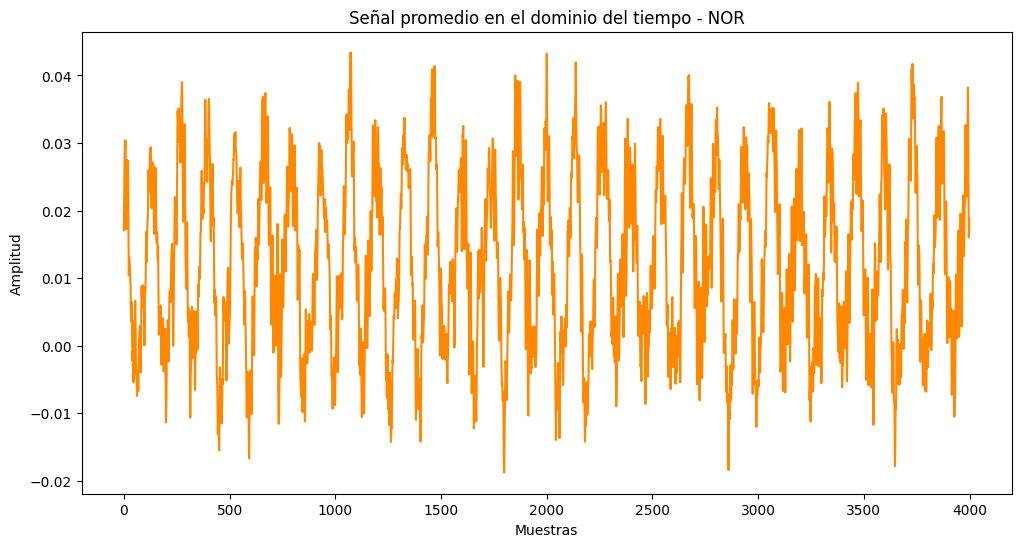

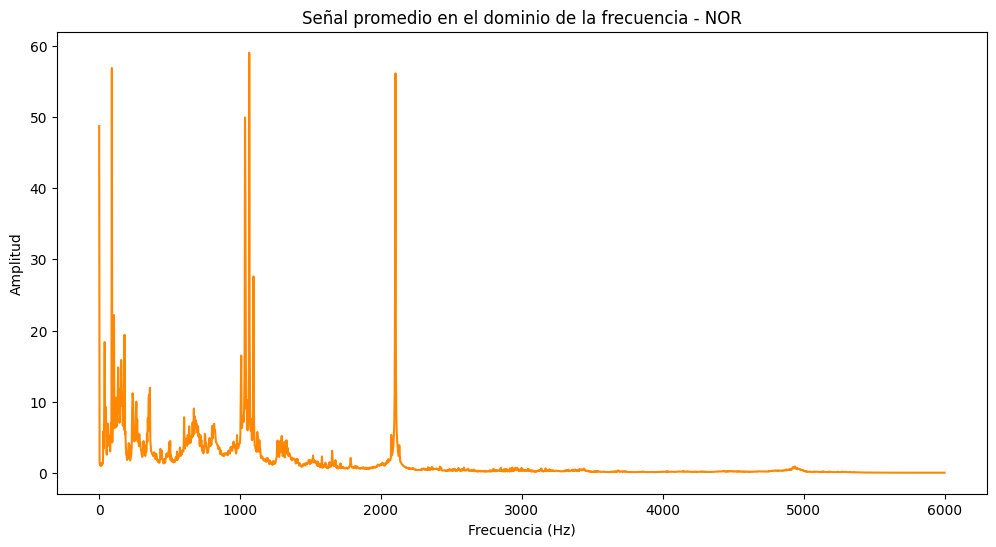

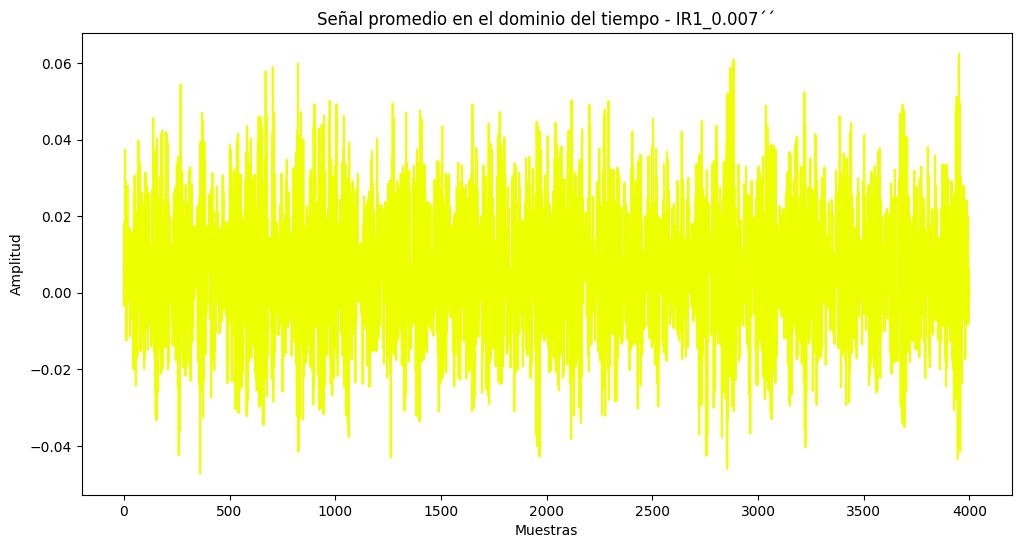

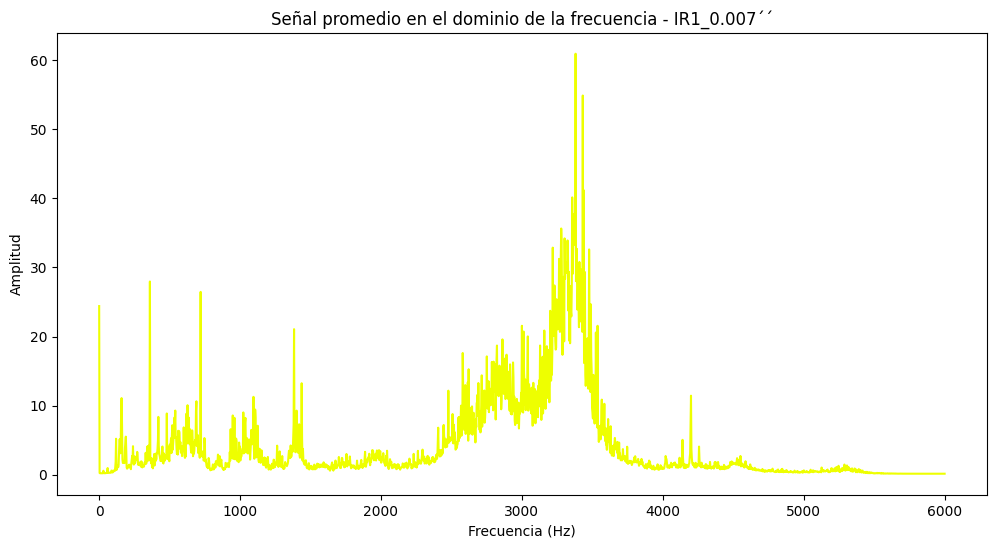

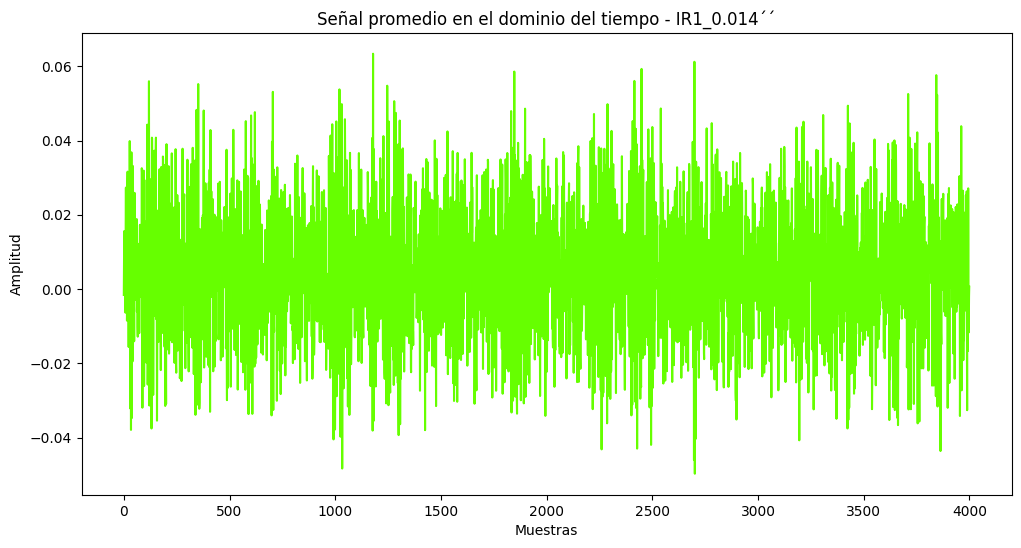

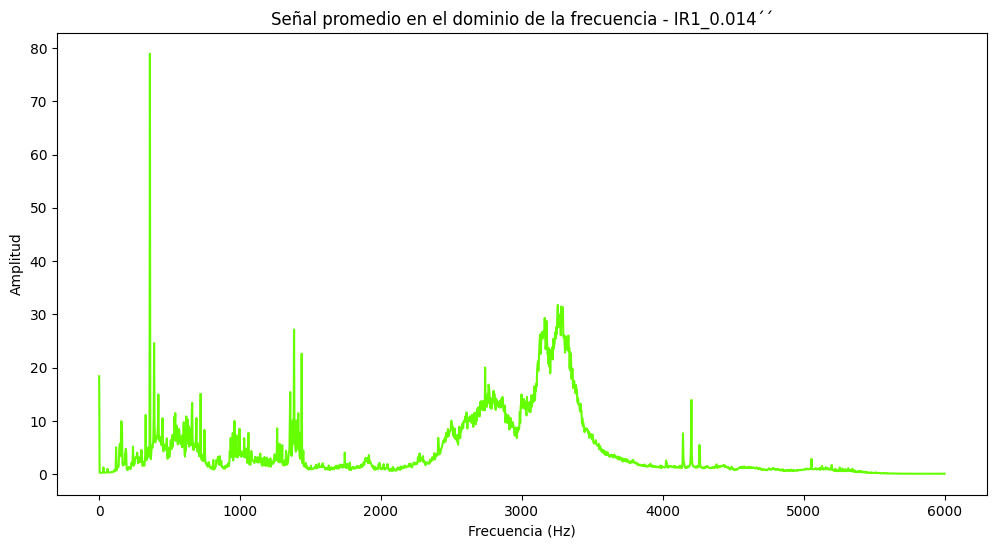

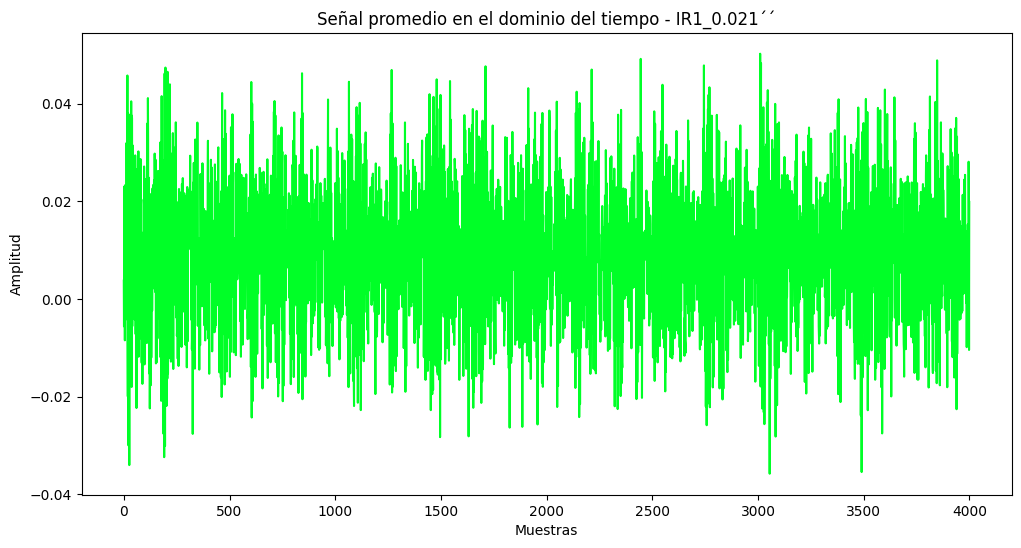

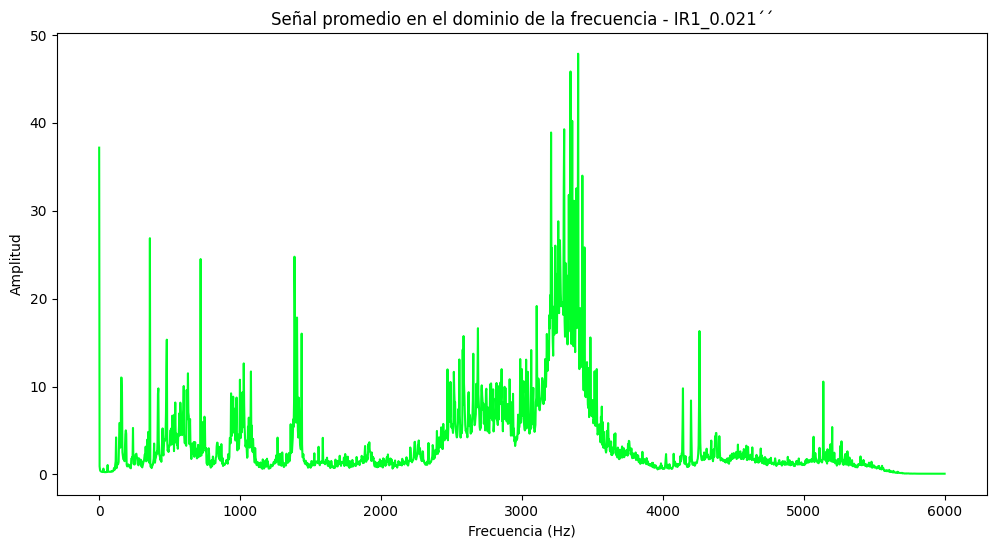

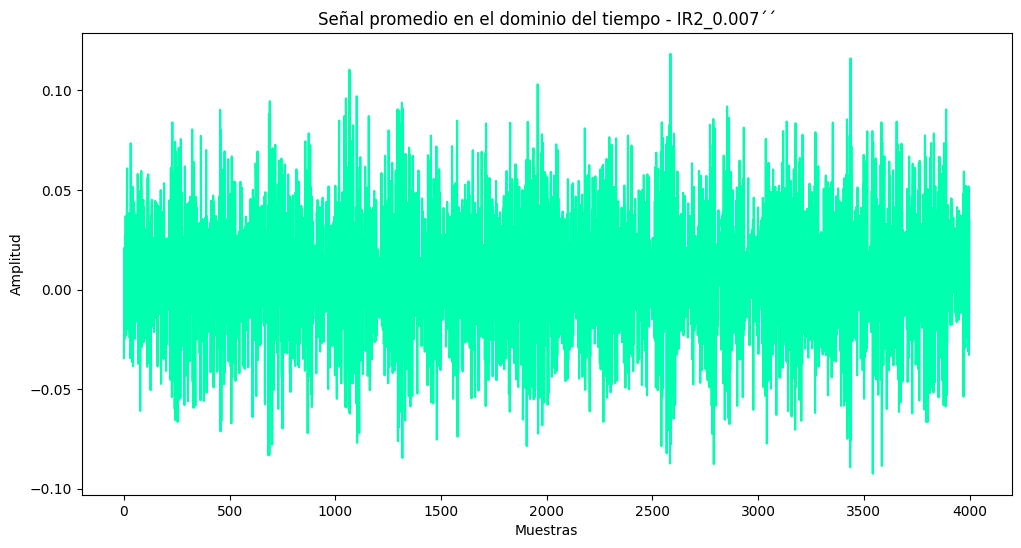

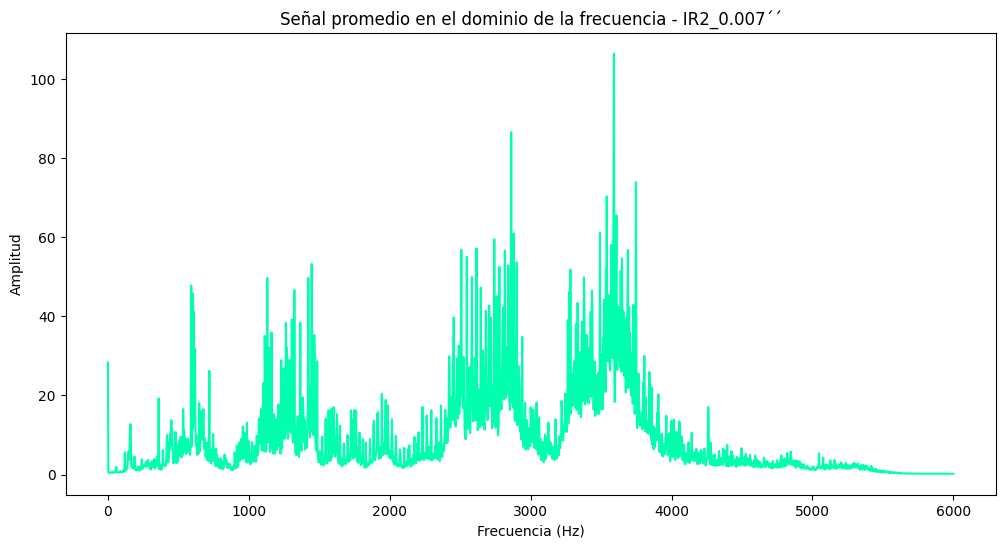

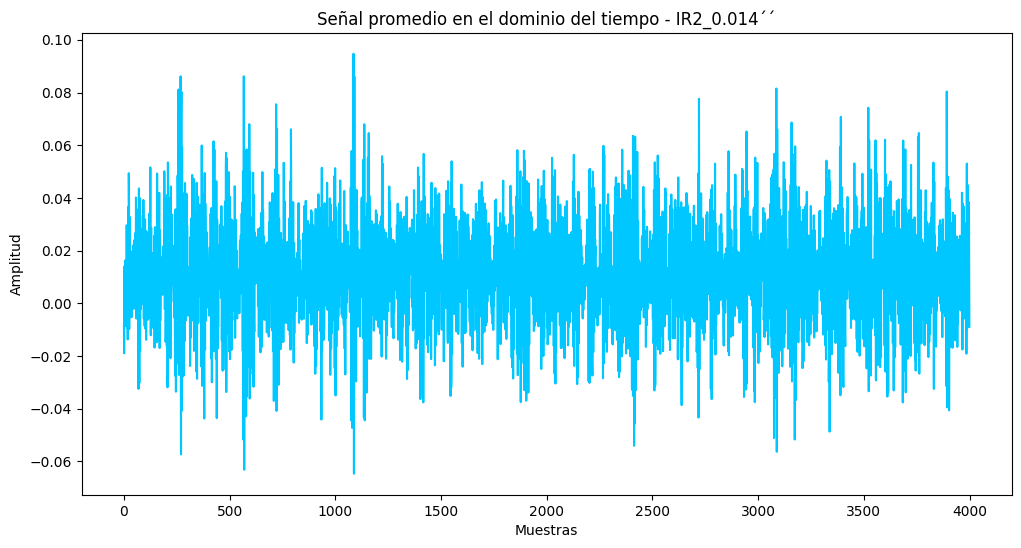

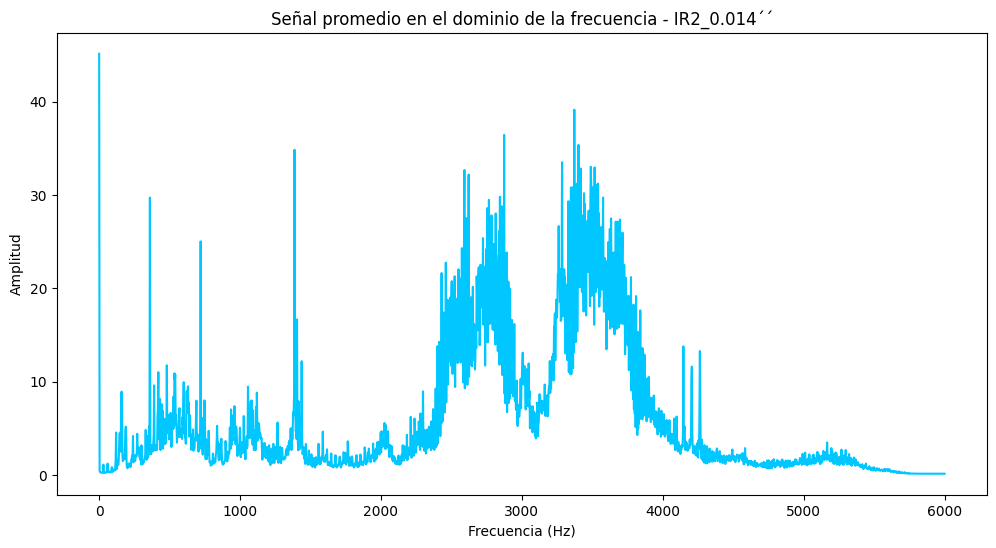

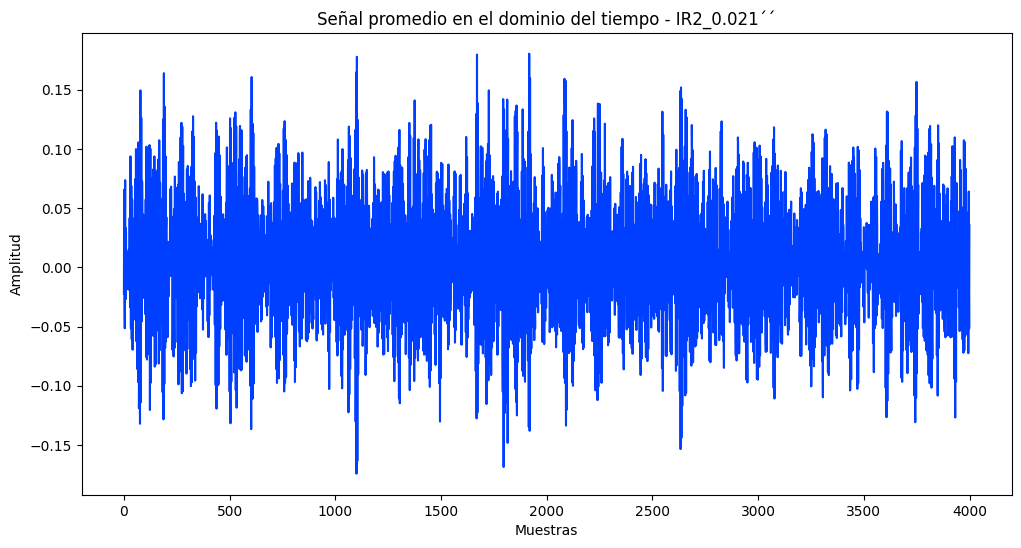

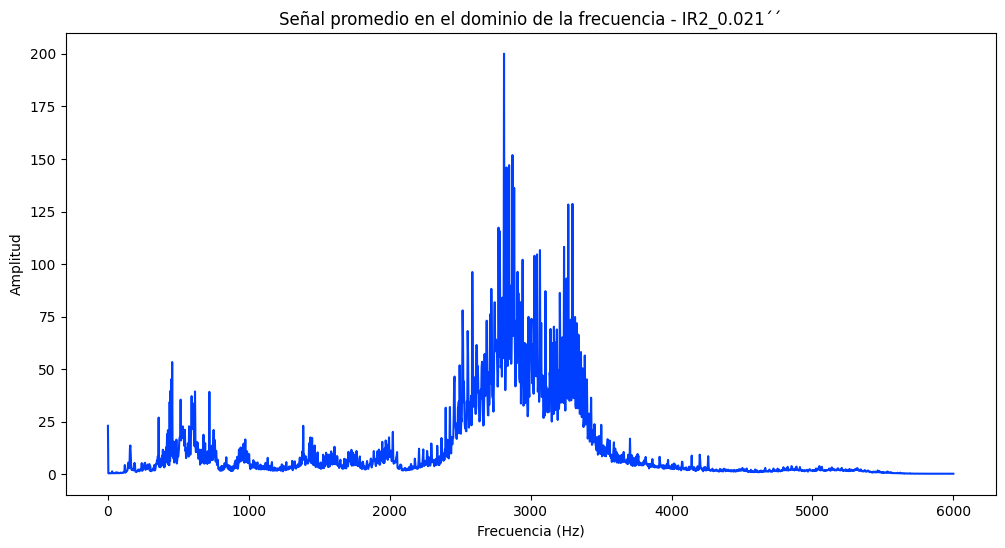

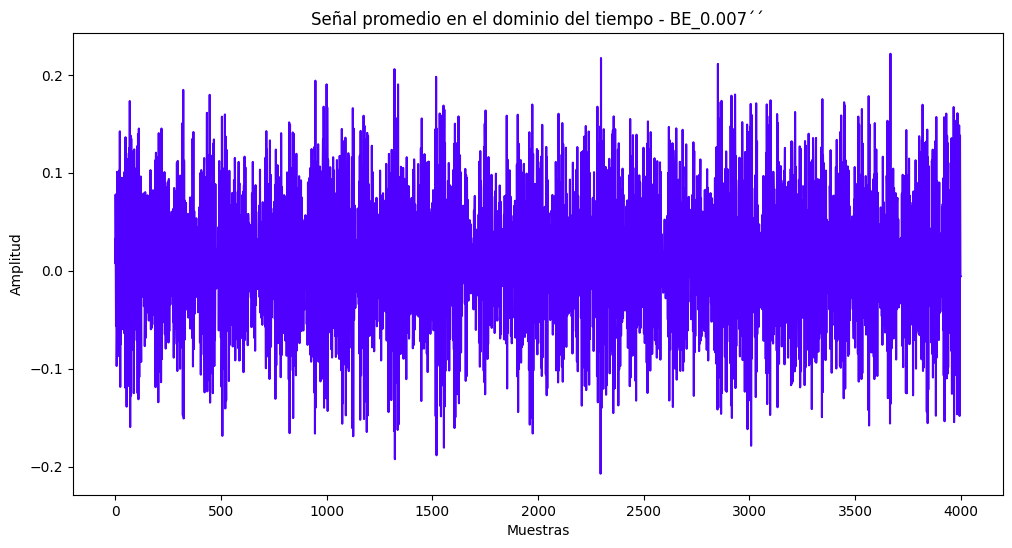

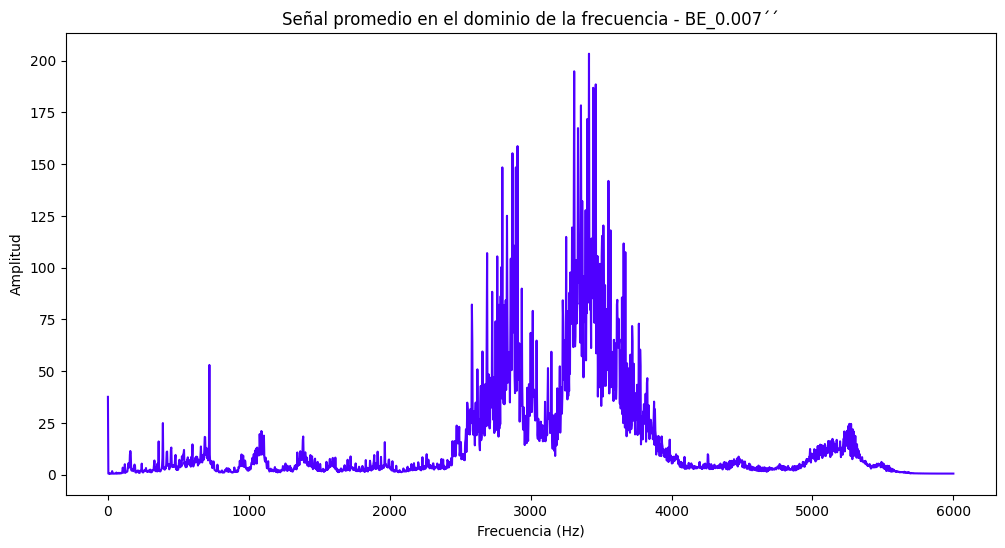

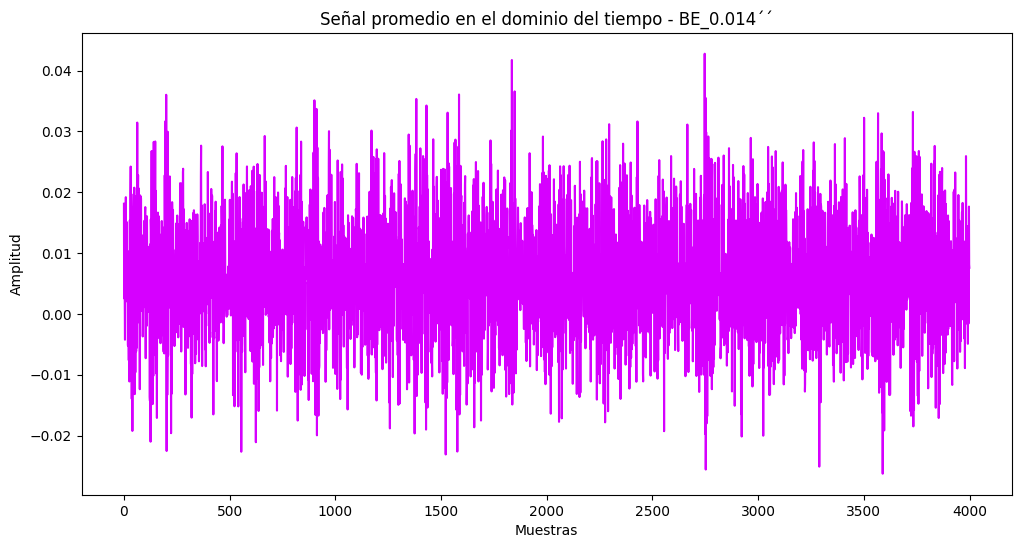

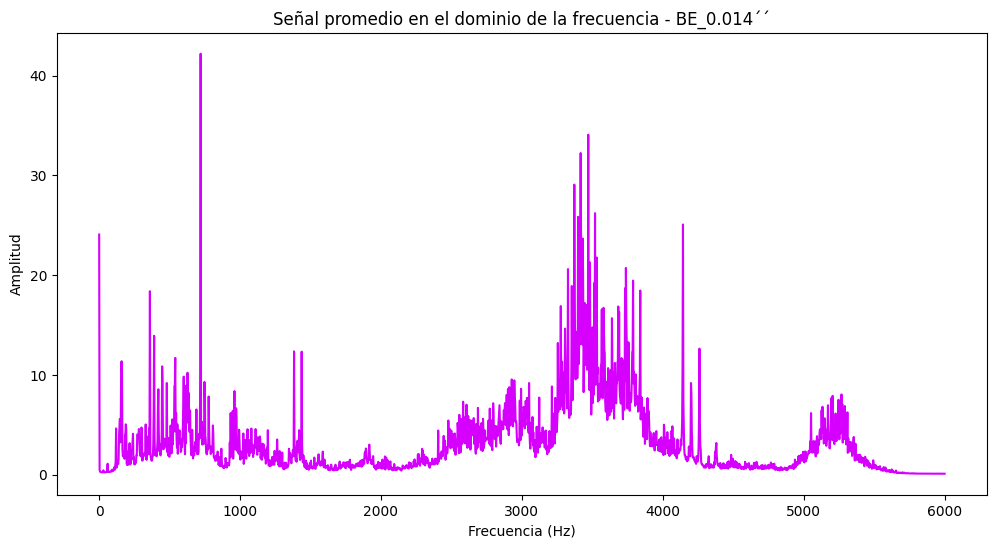

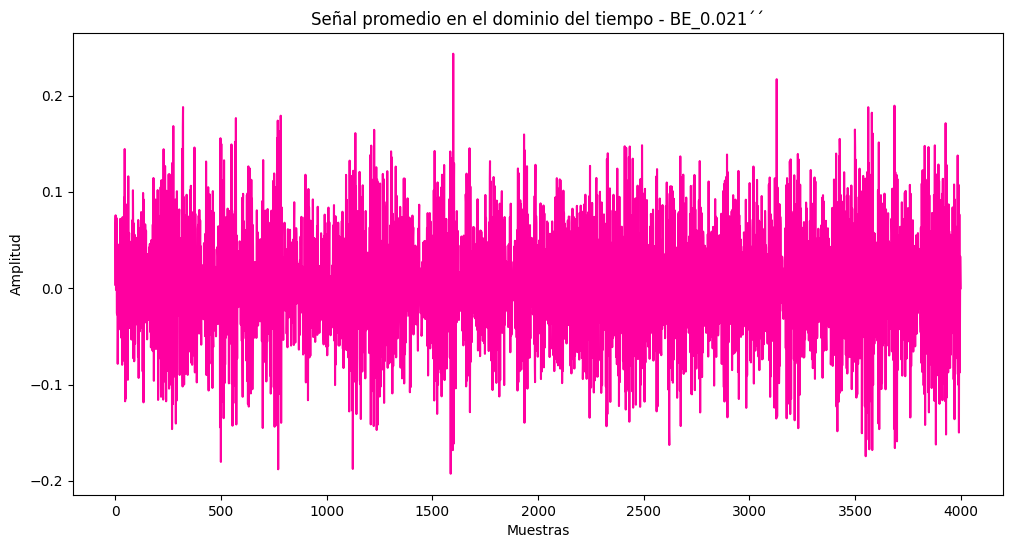

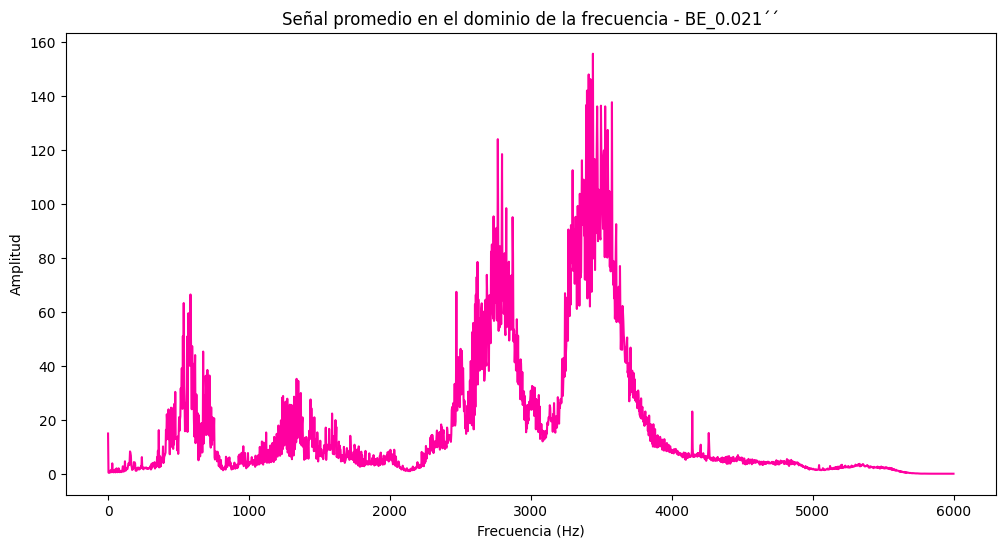

Precisión en el conjunto de prueba: 0.50


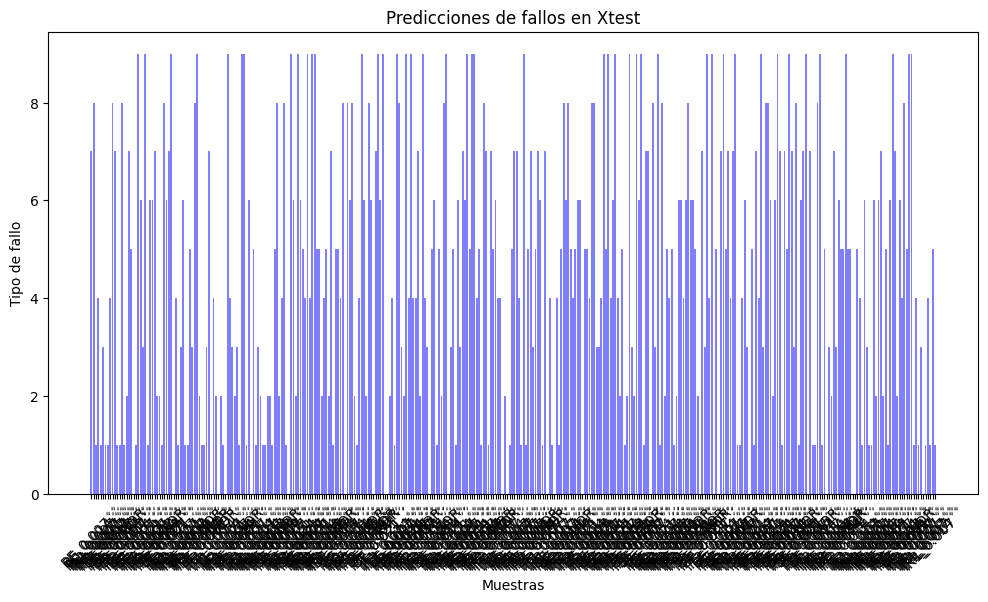

<ipython-input-27-2b46361e3b1d>:84: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.where(Ytest == label)[0], [label] * np.sum(Ytest == label), c=color, label=labels_[label-1])


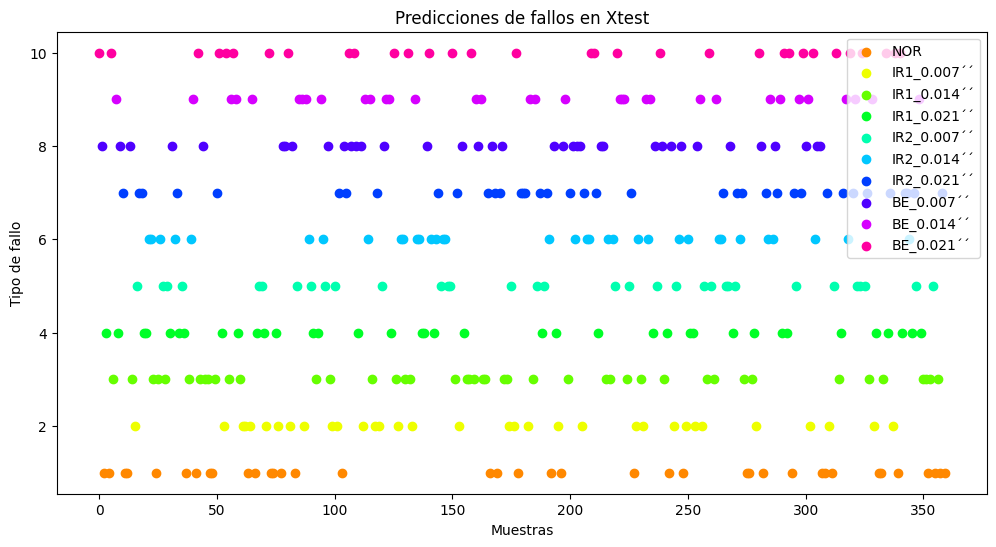

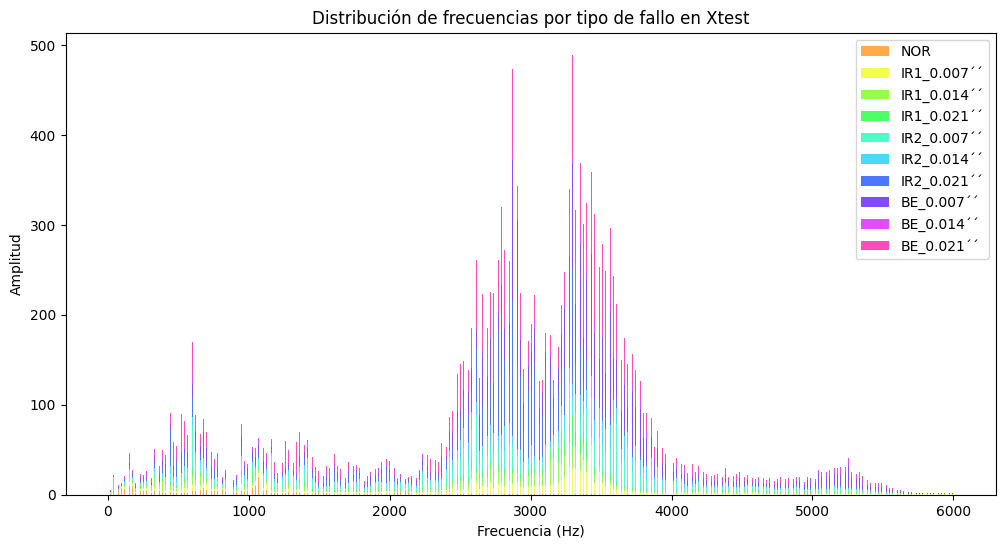

In [27]:
# Importación de librerías
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importar seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Cargar datos
path_ = 'CaractCE.mat'
dicX = sio.loadmat(path_)
Xt = dicX['F']
Fs = 12000
Tl = Xt.shape[1] / Fs
print('Xt shape:', Xt.shape)
print('Tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:, 2]  # Clases de fallos en los rodamientos

labels_ = ['NOR', 'IR1_0.007´´', 'IR1_0.014´´', 'IR1_0.021´´',
           'IR2_0.007´´', 'IR2_0.014´´', 'IR2_0.021´´',
           'BE_0.007´´', 'BE_0.014´´', 'BE_0.021´´']

# Partir datos para entrenamiento y prueba
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3, random_state=42)

# Calcular espectro de Fourier de Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1], 1 / Fs)  # Vector de frecuencia
Xw = (abs(np.fft.rfft(Xtrain)))  # FFT

# Usar una paleta de colores para diferenciar los fallos
color_palette = sns.color_palette("hsv", len(np.unique(Ytrain)))

# Graficar señal promedio en el dominio del tiempo y frecuencia por tipo de fallo
for label, color in zip(np.unique(Ytrain), color_palette):
    plt.figure(figsize=(12, 6))
    plt.plot(np.mean(Xtrain[Ytrain == label, :], axis=0), color=color)
    plt.title(f"Señal promedio en el dominio del tiempo - {labels_[label-1]}")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(vf, np.mean(Xw[Ytrain == label, :], axis=0), color=color)
    plt.title(f"Señal promedio en el dominio de la frecuencia - {labels_[label-1]}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud")
    plt.show()

# Diseñar y entrenar un detector de fallos (usando RandomForest como ejemplo)
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(Xtrain_scaled, Ytrain)

# Realizar predicciones en el conjunto de prueba
Xtest_scaled = scaler.transform(Xtest)
Ypred = model.predict(Xtest_scaled)

# Calcular precisión en el conjunto de prueba
accuracy = accuracy_score(Ytest, Ypred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Crear un gráfico de barras para mostrar las predicciones de fallos en Xtest
plt.figure(figsize=(12, 6))

# Filtrar las predicciones para asegurarse de que estén dentro del rango de etiquetas
filtered_predictions = [int(pred) if 0 <= int(pred) < len(labels_) else 0 for pred in Ypred]

plt.bar(np.arange(len(Ypred)), filtered_predictions, color='b', alpha=0.5, label='Predicciones')
plt.xticks(np.arange(len(Ypred)), [labels_[pred] for pred in filtered_predictions], rotation=45)
plt.title("Predicciones de fallos en Xtest")
plt.xlabel("Muestras")
plt.ylabel("Tipo de fallo")
plt.show()

# Crear un gráfico de dispersión con las predicciones de error
plt.figure(figsize=(12, 6))

for label, color in zip(np.unique(Ytest), color_palette):
    plt.scatter(np.where(Ytest == label)[0], [label] * np.sum(Ytest == label), c=color, label=labels_[label-1])

plt.title("Predicciones de fallos en Xtest")
plt.xlabel("Muestras")
plt.ylabel("Tipo de fallo")
plt.legend()
plt.show()

# Crear un gráfico de barras apiladas para mostrar la distribución de frecuencias por tipo de fallo en Xtest
plt.figure(figsize=(12, 6))

# Obtener la distribución de frecuencias por tipo de fallo
freq_distributions = []

for label in np.unique(Ytrain):
    freq_distribution = np.mean(Xw[Ytrain == label, :], axis=0)
    freq_distributions.append(freq_distribution)

# Graficar el gráfico de barras apiladas
bottom = np.zeros(len(freq_distributions[0]))

for label, freq_distribution, color in zip(np.unique(Ytrain), freq_distributions, color_palette):
    plt.bar(vf, freq_distribution, label=labels_[label-1], color=color, alpha=0.7, bottom=bottom)
    bottom += freq_distribution

plt.title("Distribución de frecuencias por tipo de fallo en Xtest")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


In [28]:
# Calcular la precisión de detección de fallos
detection_accuracy = accuracy_score(Ytest, Ypred)
print(f"Precisión de detección de fallos: {detection_accuracy * 100:.2f}%")


Precisión de detección de fallos: 49.72%


In [29]:
# Realizar predicciones en el conjunto de prueba (Xtest)
Ypred = model.predict(Xtest)

# Mapeo de etiquetas a nombres de clases
etiquetas_clases = ['NOR', 'IR1_0.007', 'IR1_0.014', 'IR1_0.021', 'IR2_0.007', 'IR2_0.014', 'IR2_0.021', 'BE_0.007', 'BE_0.014', 'BE_0.021']

# Mostrar los tipos de fallos detectados en Xtest
print("Tipos de fallos detectados en Xtest:")
for i in range(len(Ypred)):
    if Ypred[i] >= 0 and Ypred[i] < len(etiquetas_clases):
        clase_predicha = etiquetas_clases[Ypred[i]]
        print(f"Muestra {i + 1}: {clase_predicha}")
    else:
        print(f"Muestra {i + 1}: Clase fuera de rango")


Tipos de fallos detectados en Xtest:
Muestra 1: IR1_0.007
Muestra 2: IR2_0.007
Muestra 3: IR1_0.007
Muestra 4: IR1_0.007
Muestra 5: IR1_0.007
Muestra 6: IR1_0.007
Muestra 7: IR1_0.007
Muestra 8: IR1_0.007
Muestra 9: IR1_0.007
Muestra 10: IR2_0.021
Muestra 11: Clase fuera de rango
Muestra 12: IR1_0.007
Muestra 13: IR1_0.007
Muestra 14: IR2_0.007
Muestra 15: IR1_0.007
Muestra 16: IR1_0.007
Muestra 17: IR1_0.007
Muestra 18: IR2_0.021
Muestra 19: IR2_0.021
Muestra 20: IR1_0.007
Muestra 21: IR1_0.007
Muestra 22: IR1_0.007
Muestra 23: IR1_0.007
Muestra 24: IR1_0.007
Muestra 25: IR1_0.007
Muestra 26: IR1_0.007
Muestra 27: IR1_0.007
Muestra 28: IR1_0.007
Muestra 29: IR1_0.007
Muestra 30: IR1_0.007
Muestra 31: IR1_0.007
Muestra 32: IR1_0.014
Muestra 33: IR1_0.007
Muestra 34: IR1_0.007
Muestra 35: IR1_0.007
Muestra 36: IR1_0.014
Muestra 37: IR1_0.007
Muestra 38: IR1_0.007
Muestra 39: IR1_0.007
Muestra 40: IR1_0.007
Muestra 41: IR1_0.007
Muestra 42: IR1_0.007
Muestra 43: IR2_0.021
Muestra 44: IR1

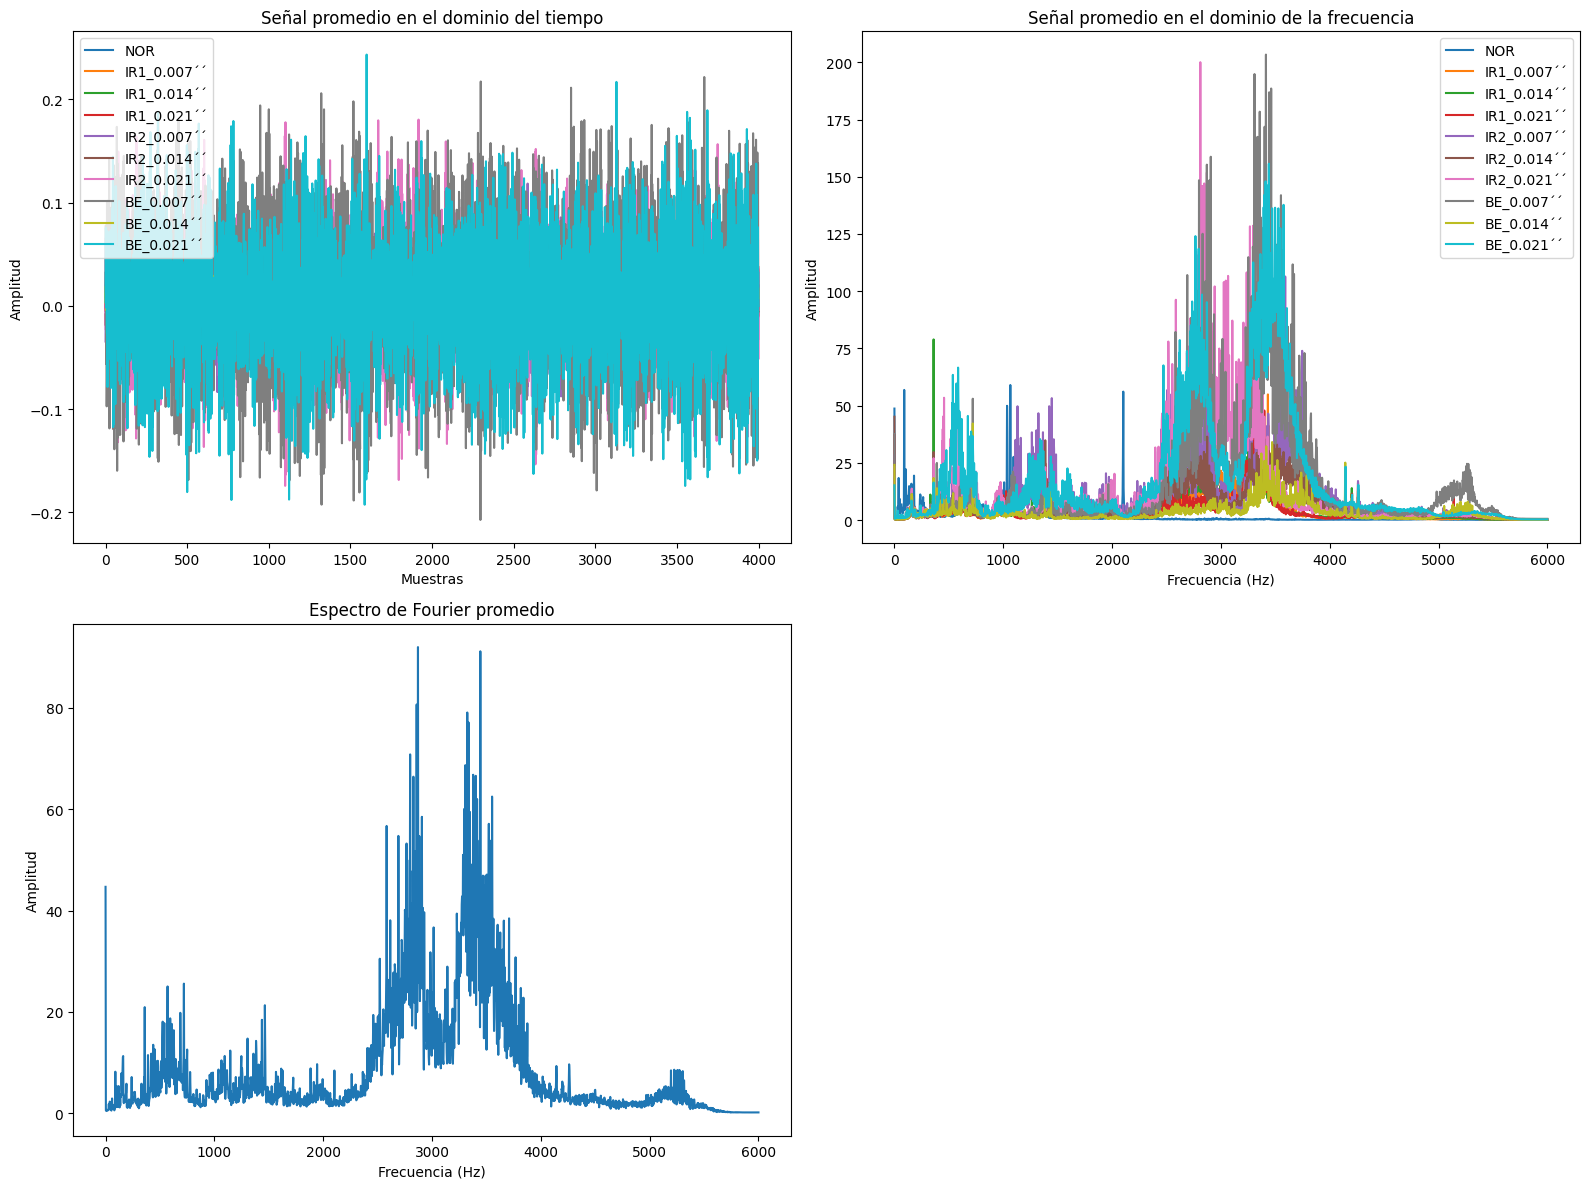

In [30]:
# Crear subplots para señal promedio en el dominio del tiempo, en el dominio de la frecuencia y espectro de Fourier promedio
plt.figure(figsize=(16, 12))

for label in np.unique(Ytrain):
    plt.subplot(2, 2, 1)
    plt.plot(np.mean(Xtrain[Ytrain == label, :], axis=0), label=labels_[label-1])

plt.title("Señal promedio en el dominio del tiempo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()

for label in np.unique(Ytrain):
    plt.subplot(2, 2, 2)
    plt.plot(vf, np.mean(Xw[Ytrain == label, :], axis=0), label=labels_[label-1])

plt.title("Señal promedio en el dominio de la frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()

# Calcular espectro de Fourier promedio
mean_spectrum = np.mean(Xw[Ytrain], axis=0)
plt.subplot(2, 2, 3)
plt.plot(vf, mean_spectrum)
plt.title("Espectro de Fourier promedio")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()


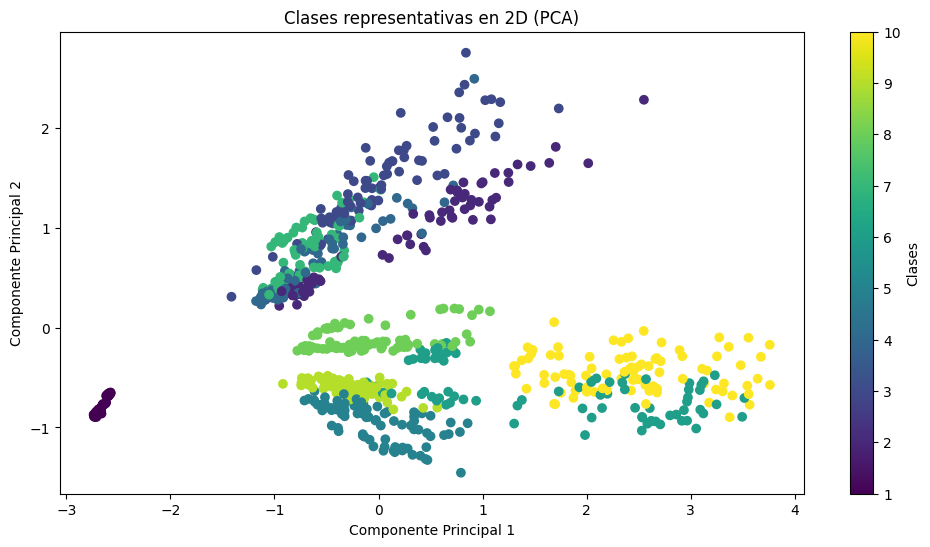

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Calcular espectro de Fourier promedio
mean_spectrum = np.mean(Xw[Ytrain], axis=0)
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T

# Realizar reducción de dimensionalidad (PCA)
pca = PCA(n_components=2)
Z = pca.fit_transform(Xw_)

# Crear un gráfico de dispersión para las clases representativas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=Ytrain, cmap='viridis', label='Xtrain')
plt.colorbar(scatter, label='Clases')
plt.title("Clases representativas en 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()
